In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Advertising.csv")
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
X = df.drop('sales',axis=1)

In [5]:
y = df['sales']

In [6]:
from sklearn.preprocessing import PolynomialFeatures

In [7]:
pf = PolynomialFeatures(degree=2, include_bias=False)

In [8]:
pf.fit(X)

PolynomialFeatures(include_bias=False)

In [10]:
tmp = pf.transform(X)

In [11]:
X.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

In [13]:
tmp.shape

(200, 9)

In [14]:
tmp[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [16]:
fit_transport_X = pf.fit_transform(X)

In [36]:
fit_transport_X.shape

(200, 9)

In [17]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test,y_train,y_test = train_test_split(fit_transport_X,y,test_size=0.3,random_state=101)

In [21]:
len(df) == len(X_train) + len(X_test)

True

In [22]:
from sklearn.linear_model import LinearRegression

In [24]:
model = LinearRegression()

In [25]:
model.fit(X_train,y_train)

LinearRegression()

In [26]:
test_predictions = model.predict(X_test)

In [27]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [28]:
mean_absolute_error(y_test,test_predictions)

0.48967980448037934

In [29]:
df['sales'].mean()

14.022500000000003

In [30]:
np.sqrt(mean_squared_error(y_test,test_predictions))

0.6646431757269275

In [31]:
test_residuals = y_test - test_predictions

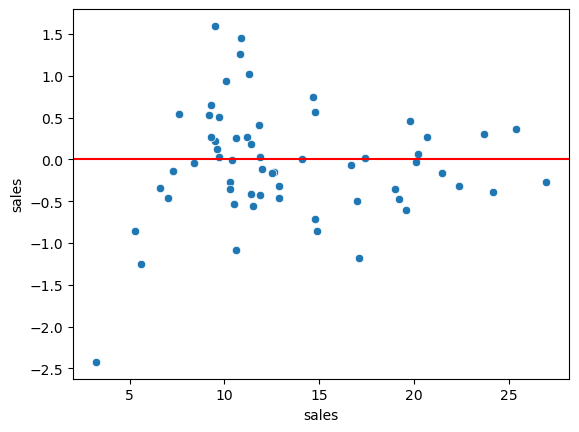

In [32]:
sns.scatterplot(x=y_test,y=test_residuals)
plt.axhline(y=0,color='red')

In [37]:
model.coef_

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

In [38]:
# create different order polynomial
# split poly features in train/test
# fit on train data
# store/save the RMSE(Root Mean Squared Error) for both tain and test data
# plot (error/polynomial)

In [39]:
train_rmse_errors = []
test_rmse_errors = []

In [41]:
for d in range (1,10):
    poly_converter = PolynomialFeatures(degree=d,include_bias=False)
    poly_feature = poly_converter.fit_transform(X)
    
    X_train, X_test,y_train,y_test = train_test_split(poly_feature,y,test_size=0.3,random_state=101)
    model = LinearRegression()
    model.fit(X_train,y_train)
    
    train_prediction = model.predict(X_train)
    test_prediction = model.predict(X_test)
    
    train_rmse = np.sqrt(mean_squared_error(y_train,train_prediction))
    test_rmse = np.sqrt(mean_squared_error(y_test,test_prediction))
    
    train_rmse_errors.append(train_rmse)
    test_rmse_errors.append(test_rmse)
    

In [42]:
train_rmse_errors

[1.7345941243293763,
 0.5879574085292231,
 0.4339344356902066,
 0.35170836883993517,
 0.2509342951990972,
 0.19940660520798886,
 5.4214253451953605,
 0.14198684885973445,
 0.1666628383038627]

In [43]:
test_rmse_errors

[1.5161519375993877,
 0.6646431757269275,
 0.5803286825156331,
 0.5077742623309994,
 2.5758247707699113,
 4.490840128985557,
 1381.3940440344732,
 4449.685935518502,
 95891.23665756262]

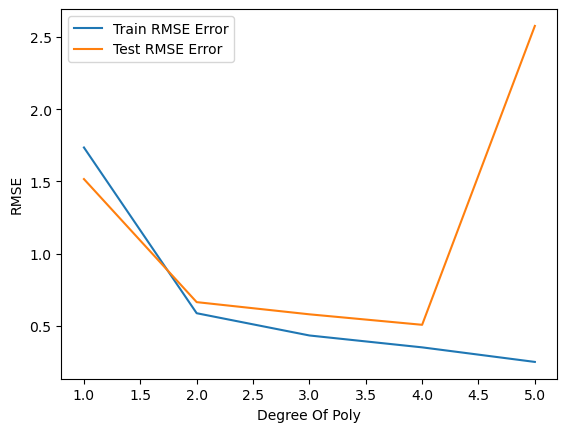

In [51]:
plt.plot(range(1,6),train_rmse_errors[:5],label='Train RMSE Error')
plt.plot(range(1,6),test_rmse_errors[:5],label='Test RMSE Error')
plt.ylabel('RMSE')
plt.xlabel('Degree Of Poly')
plt.legend()

In [57]:
final_converter = PolynomialFeatures(degree=3,include_bias=False)
final_features = final_converter.fit_transform(X)
final_model = LinearRegression()
final_model.fit(final_features,y)


LinearRegression()

In [58]:
from joblib import dump,load


In [60]:
dump(final_model,'final_poly_sales_model.joblib')

['final_poly_sales_model.joblib']

In [61]:
dump(final_converter,'final_poly_converter.joblib')

['final_poly_converter.joblib']

In [62]:
loaded_converter = load('final_poly_converter.joblib')

In [64]:
loaded_converter

PolynomialFeatures(degree=3, include_bias=False)

In [65]:
loaded_model = load('final_poly_sales_model.joblib')
loaded_model

LinearRegression()

In [66]:
campaign=[[149,22,12]]

In [70]:
tranformed_data = loaded_converter.fit_transform(campaign)

In [71]:
loaded_model.predict(tranformed_data)

array([14.64501014])